<a href="https://colab.research.google.com/github/PozzaMarco/Albero-Decisionale-su-dataset-Iris/blob/master/Albero_decisionale_su_dataset_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementazione di un albero decisionale su dataset Iris
Esempio di albero di decisione creato utilizzando il dataset Iris.
Il dataset è strutturato in:


*   150 campioni;
*   4 attributi (petal width, petal length, sepal width, sepal length);
*   3 classi (0= Iris Setosa, 1= Iris Versicolour, 2= Iris Virginica);
*   50 campioni per classe.

La libreria utilizzata è DecisionTreeClassifier fornita da sklearn. L' esempio è stato utilizzato per vedere gli effetti del Reduced Error Pruning e della variazione del guadagno informativo tramite l'entropia o l'impurità di gini gli unici due metodi di impurità implementati dal DecisionTreeClassifier.

![](https://docs.google.com/uc?export=download&id=10Y8w6hZUwJpKwUIWwU1-VTYIzruVafNx)

I grafici tracciati mostrano la differenza trq un albero di decisione che utilizza come impurità l'**entropia** e uno che utilizza l'impurità di **gini**.
Con i dati da noi considerati possiamo notare come l'impurità di **gini** riesca a classificare in modo più accurato le varie tipologie di fiori riusciendo a raggiungere un accuratezza del 97% rispetto al calcolo con **entropia** che raggiunge un, seppur ottimo, 90% di accuratezza.

Dai grafici rappresentanti gli alberi è possibile notare che, già alla prima iterazione, il ramo a sinistra è già puro e vengono classificati 42 esemplari di fiori come *Iris-Setosa*. Il ramo di destra invece viene utilizzato per le ulteriori classificazioni che servono a separare i campioni rimanenti in *Iris-Versicolor* e in *Iris-Virginica*.

Quello che si può dire, valutando l'andamento generale dei grafici che rappresentano gli alberi, è che si può notare subito che l'albero generato dall'utilizzo dell'**entropia** ha una profondità di 7 (con radice nodo 0) contro la profondità di 6 utilizzando l'impurità di **gini**.
Questo fa capire come l'impurità di **gini** riesca, in questo esempio, a selezionare degli attributi che riescono ad avere un **information gain** più significativo rispetto a l'**entropia** riuscendo a fermarsi uno step prima nella profondità dell'albero. 

Da questo esperimento si può quindi dire che l'impurità di **gini** non solo è più accurata ma riesce a discriminare i campioni utilizzando degli attributi e dei confronti che, rispetto all'**entropia**, hanno un information gain più elevato.


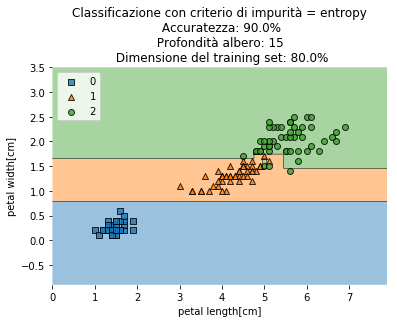

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 

#Parametri di configurazione
criteria = ["entropy","gini"] #criteri di impurità
max_depth = 15 #massima altezza dell'albero.
test_size = 0.2

iris_dataset = load_iris()
iris_dataframe = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']], columns= iris_dataset['feature_names'] + ['target'])
#display(iris_dataframe)

attributes = iris_dataframe[["petal length (cm)", "petal width (cm)"]]
#display(attributes)

classes = iris_dataframe[["target"]]
#display(classes)

X_train, X_test, Y_train, Y_test = train_test_split(attributes, classes, test_size = test_size, random_state=5)

for criterion in criteria:
  X_attributes = np.vstack((X_train, X_test))
  Y_classes= np.vstack((Y_train, Y_test)).flatten()
  
  tree = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, random_state = 0)
  tree.fit(X_train, Y_train);
  
  fileName = "decisionTree_" + str(criterion)
  fileDOT = fileName + ".dot"
  filePNG = fileName + ".png"
  
  export_graphviz(tree, out_file=fileDOT, feature_names=['petal length','petal width'])
  
  !dot $fileDOT -Tpng -o $filePNG #trasformo il file.dot in un immainge.png
  
  predictedClasses = tree.predict(X_test)
  accurancy = round(tree.score(X_test,Y_test),2)*100
    
  #Stampa del grafico associato all'albero
  plot_decision_regions(X_attributes, Y_classes.astype(np.integer), clf=tree)
  plt.title("Classificazione con criterio di impurità = " + str(criterion) + "\n Accuratezza: " + str(accurancy) + 
             "%\n Profondità albero: " + str(max_depth) + " \n Dimensione del training set: " + str((1 - test_size)*100) +"%")
  plt.xlabel("petal length[cm]")
  plt.ylabel("petal width[cm]")
  plt.legend(loc="upper left")
  plt.show()
    
  !rm *.dot
  